# TASK #1: PROJECT OVERVIEW 


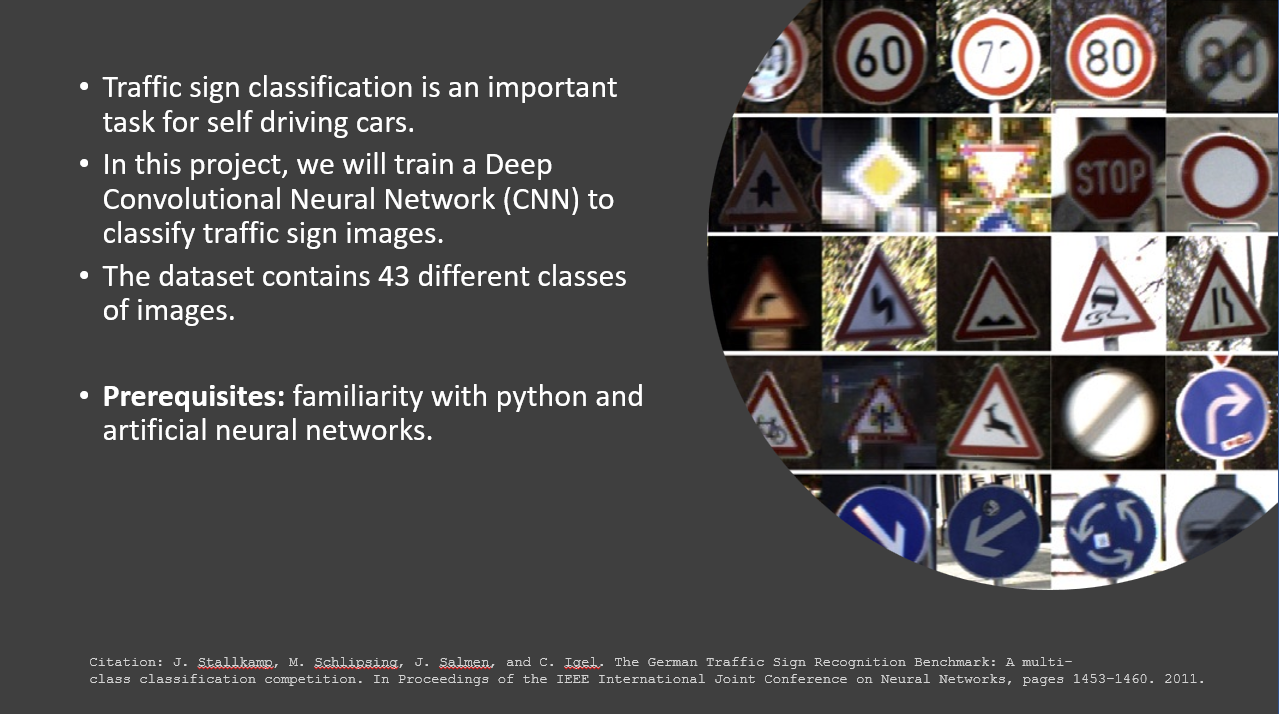

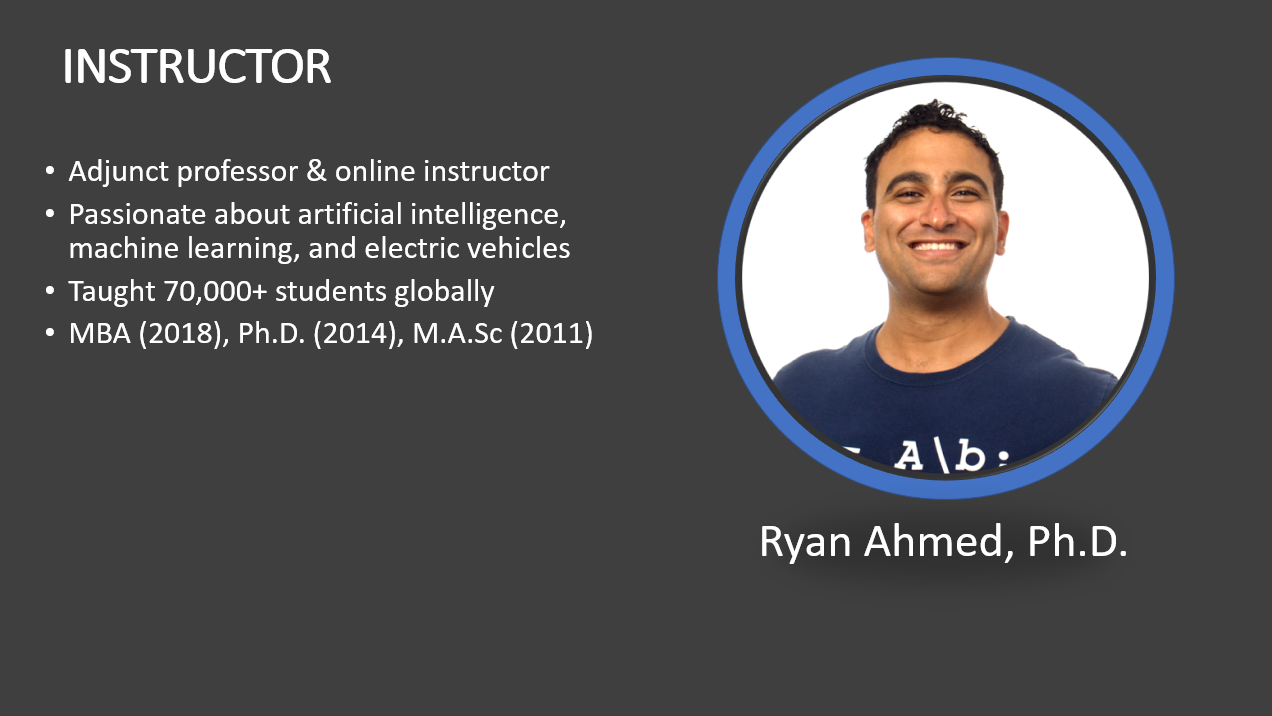

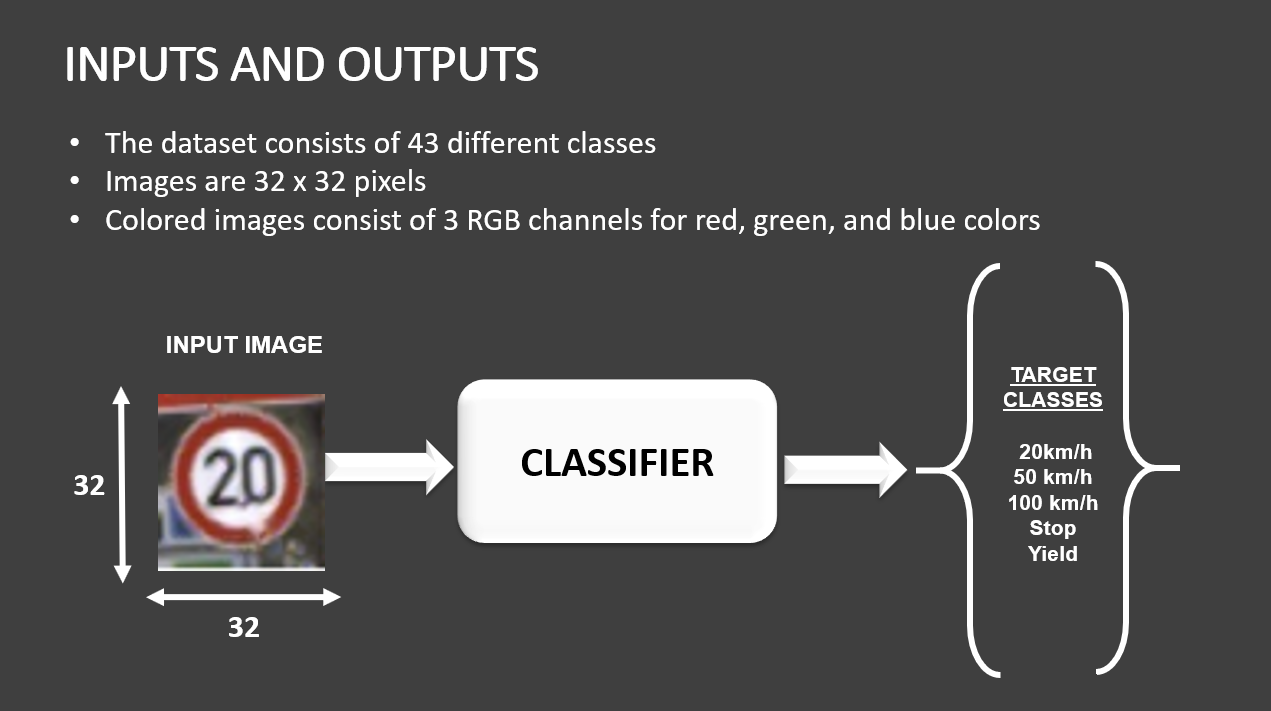

# TASK #2: IMPORT LIBRARIES/DATASETS

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

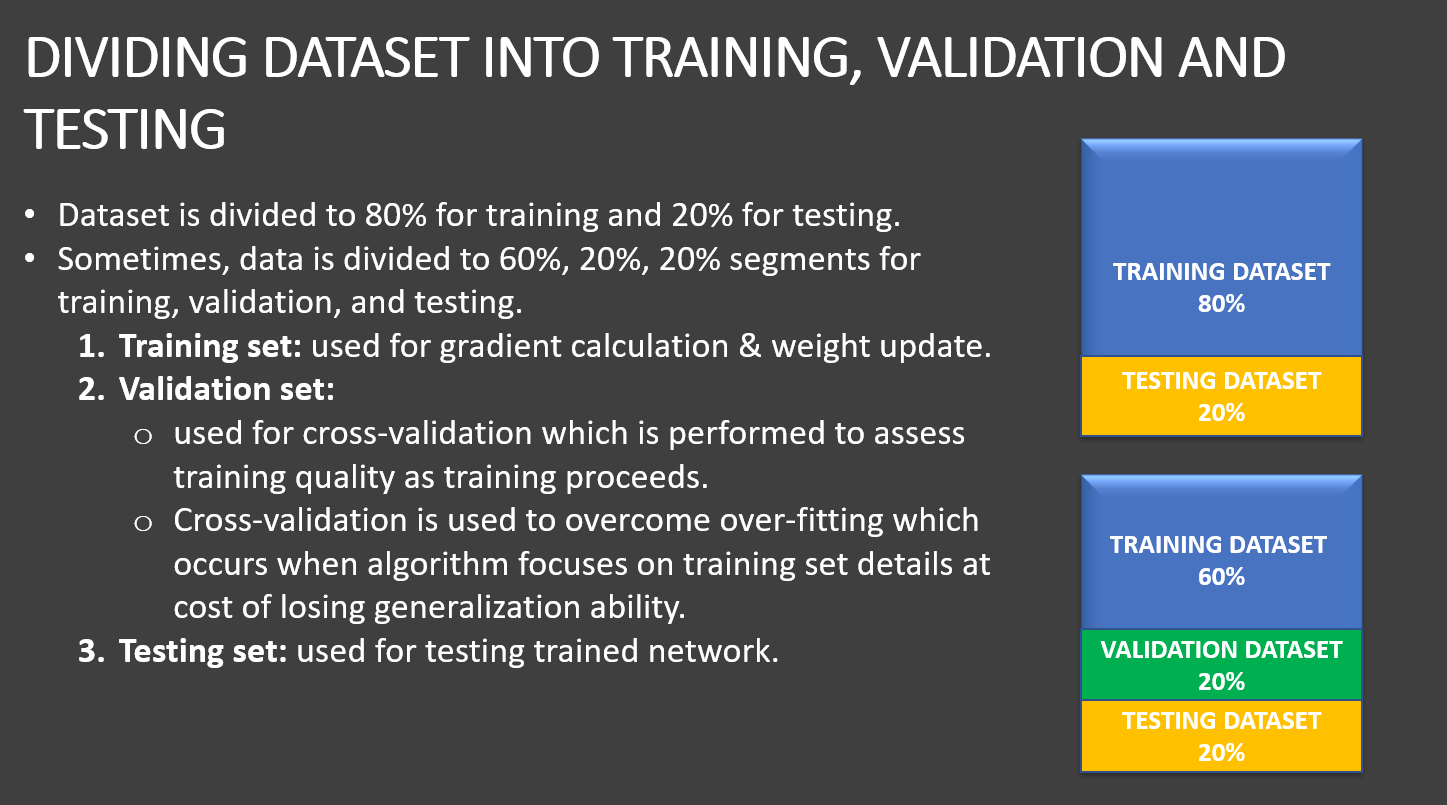

In [43]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [44]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [45]:
X_train.shape

(34799, 32, 32, 3)

In [46]:
y_train.shape

(34799,)

# TASK #3: PERFORM IMAGES VISUALIZATION

5

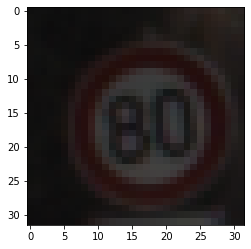

In [47]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

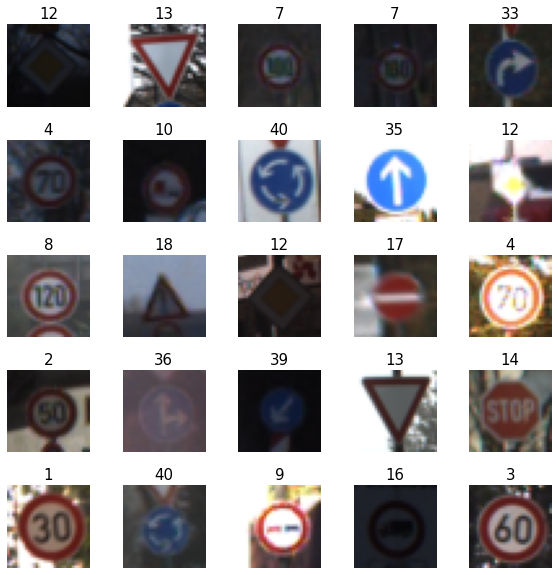

In [48]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)
        

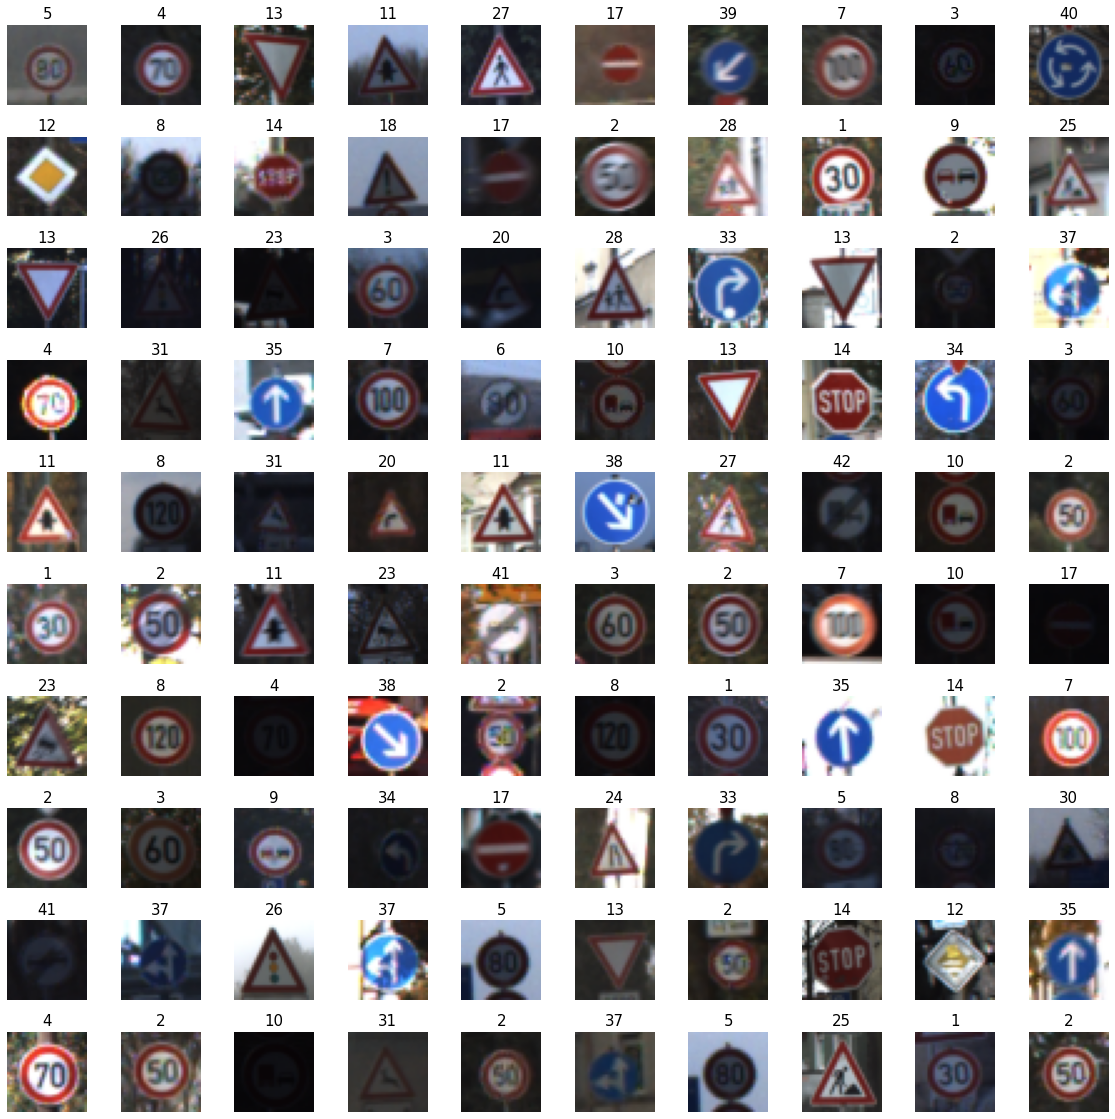

In [49]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)
        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [50]:
from sklearn.utils import shuffle # WE do shuffle so that our network doesn't learn the
# order of the images
X_train, y_train = shuffle(X_train, y_train)

In [51]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims= True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims= True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims= True)

In [52]:
X_train_gray.shape

(34799, 32, 32, 1)

In [53]:
# Normalization
X_train_gray_norm = (X_train_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128
X_validation_gray_norm = (X_validation_gray-128)/128

In [54]:
X_train_gray_norm

array([[[[-0.74479167],
         [-0.734375  ],
         [-0.71614583],
         ...,
         [-0.7109375 ],
         [-0.6875    ],
         [-0.69270833]],

        [[-0.75260417],
         [-0.72916667],
         [-0.71875   ],
         ...,
         [-0.70572917],
         [-0.67708333],
         [-0.6484375 ]],

        [[-0.73958333],
         [-0.71614583],
         [-0.70833333],
         ...,
         [-0.66666667],
         [-0.67447917],
         [-0.65625   ]],

        ...,

        [[-0.7109375 ],
         [-0.70572917],
         [-0.6953125 ],
         ...,
         [-0.63020833],
         [-0.63020833],
         [-0.61979167]],

        [[-0.70572917],
         [-0.6953125 ],
         [-0.70052083],
         ...,
         [-0.60416667],
         [-0.59375   ],
         [-0.57291667]],

        [[-0.6484375 ],
         [-0.66927083],
         [-0.68489583],
         ...,
         [-0.546875  ],
         [-0.52604167],
         [-0.50260417]]],


       [[[ 0.625     ],


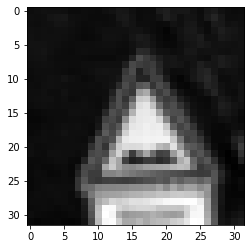

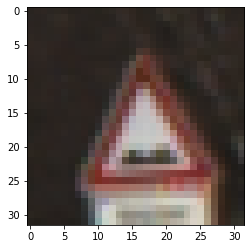

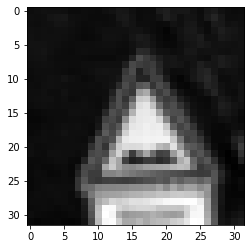

In [55]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

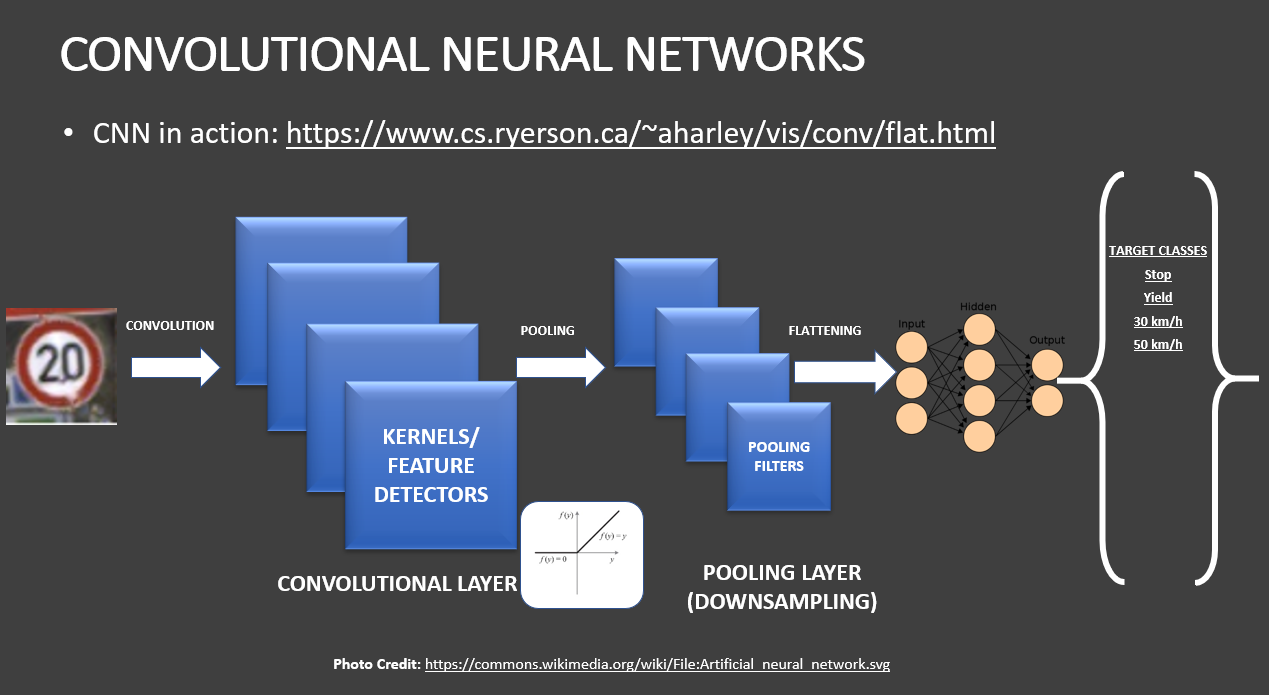

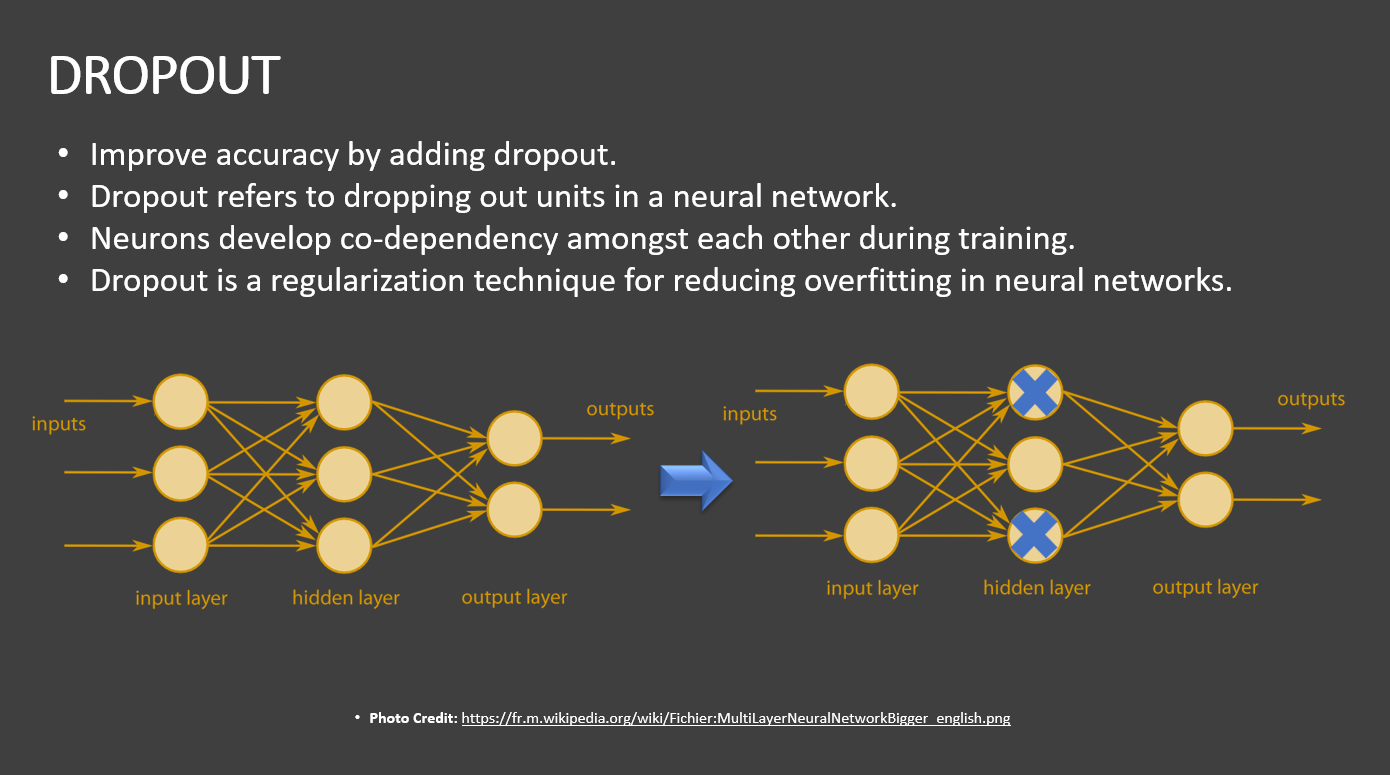

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [56]:
from tensorflow.keras import datasets, layers, models
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5), activation = 'relu', input_shape= (32,32,1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16,(5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation= 'relu'))
CNN.add(layers.Dense(84, activation= 'relu'))
CNN.add(layers.Dense(43, activation='softmax')) #As we have 43 output Classses
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)              

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [57]:
CNN.compile(optimizer='Adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [58]:
"""
history= CNN.fit(X_train_gray_norm,
                y_train,
                batch_size=500,
                epochs=5,
                verbose=1,
                validation_data=(X_validation_gray_norm,y_validation))
"""

'\nhistory= CNN.fit(X_train_gray_norm,\n                y_train,\n                batch_size=500,\n                epochs=5,\n                verbose=1,\n                validation_data=(X_validation_gray_norm,y_validation))\n'

In [59]:
# Check for 50 Epochs, Is accuracy improved?

In [70]:
history= CNN.fit(X_train_gray_norm,
                y_train,
                batch_size=500,
                epochs=50,
                verbose=1,
                validation_data=(X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 23s 666us/sample - loss: 0.2149 - accuracy: 0.9400 - val_loss: 0.4404 - val_accuracy: 0.8855
Epoch 2/50
34799/34799 [==============================] - 23s 672us/sample - loss: 0.1997 - accuracy: 0.9437 - val_loss: 0.4142 - val_accuracy: 0.8837
Epoch 3/50
34799/34799 [==============================] - 23s 659us/sample - loss: 0.1895 - accuracy: 0.9461 - val_loss: 0.3889 - val_accuracy: 0.8946
Epoch 4/50
34799/34799 [==============================] - 23s 658us/sample - loss: 0.1736 - accuracy: 0.9526 - val_loss: 0.4054 - val_accuracy: 0.8921
Epoch 5/50
34799/34799 [==============================] - 23s 660us/sample - loss: 0.1659 - accuracy: 0.9534 - val_loss: 0.3545 - val_accuracy: 0.9066
Epoch 6/50
34799/34799 [==============================] - 23s 660us/sample - loss: 0.1596 - accuracy: 0.9548 - val_loss: 0.3865 - val_accuracy: 0.8932
Epoch 7/50
34799/34799 [=====================

# We got 99% Training Accuracy which is good.

# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

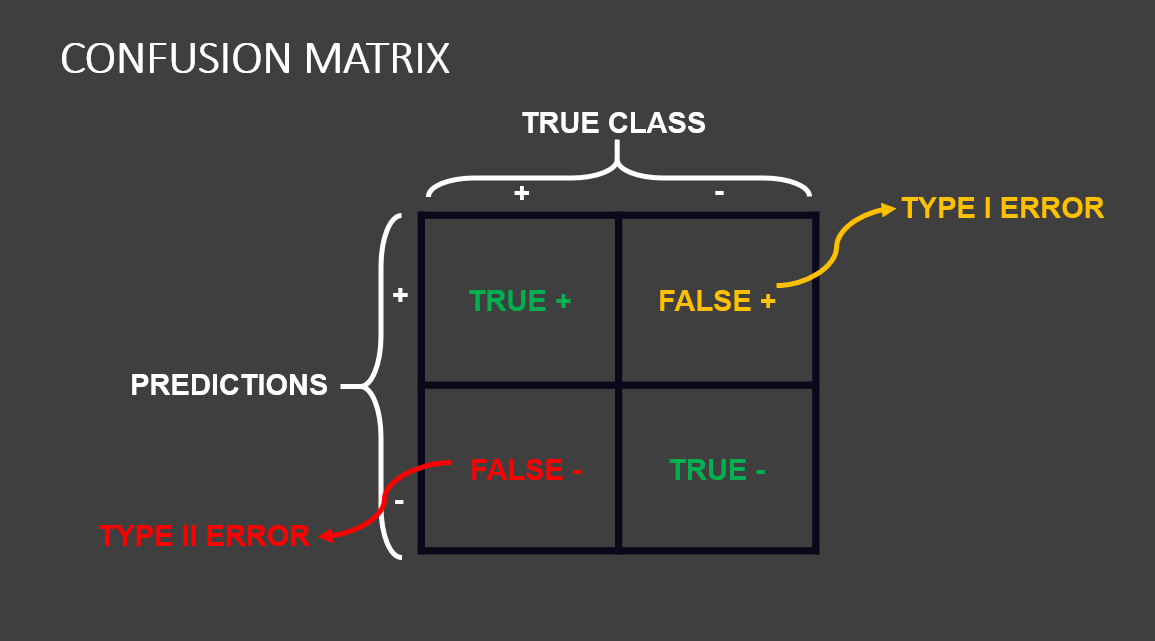

In [71]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 5s 426us/sample - loss: 0.6617 - accuracy: 0.9108
Test Accuracy: 0.9108471870422363


In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [73]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

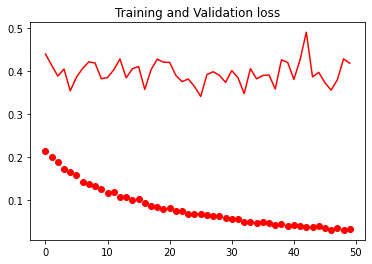

In [74]:
epochs=range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')

Text(0.5, 1.0, 'Training and Validation accuracy')

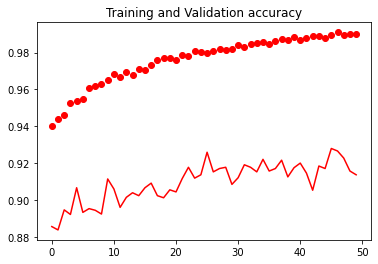

In [75]:
epochs=range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy,'r',label='Validation accuracy')
plt.title('Training and Validation accuracy')

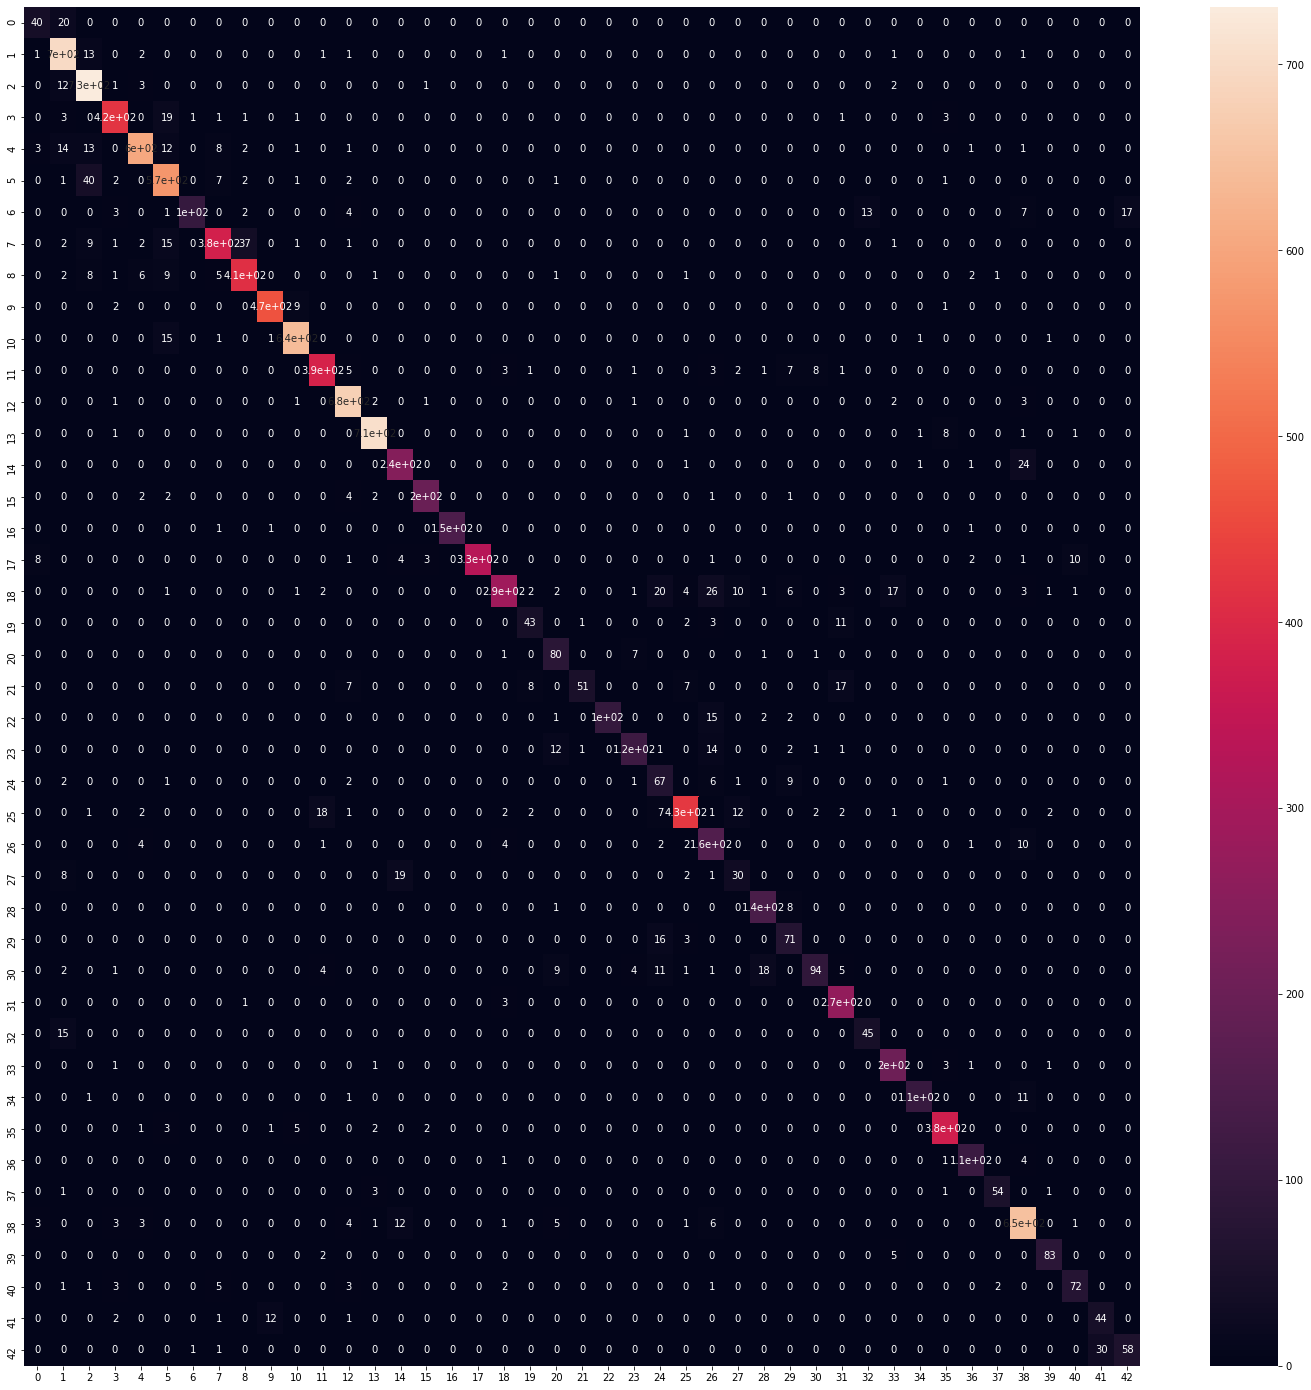

In [76]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

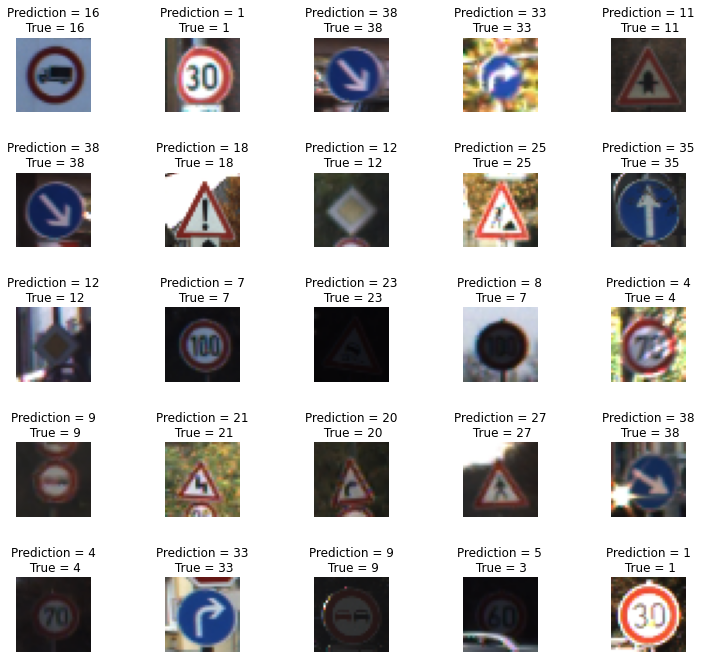

In [77]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }

In [68]:
# Thank You!